In [2]:
#importing all the necessary libraries to work with the Telco Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import sklearn.linear_model




import warnings
warnings.filterwarnings("ignore")


import acquire
import telco_prep
import exploration

In [3]:
# Acquiring the data and checking to make sure the acquisition worked by showing the top 5 rows.
telco_df = acquire.get_telco_data()

telco_df.head()

,Unnamed: 0,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL
1,1,1,2,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL
2,2,2,1,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Mailed check,Fiber optic


- Ran acquire function from SQL selecting all rows and columns
- Majority of the columns are categorical and have ability to be encoded 

In [4]:
telco_df.isna().sum()

telco_df.info()

telco_df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   payment_type_id           7043 non-null   int64  
 3   contract_type_id          7043 non-null   int64  
 4   customer_id               7043 non-null   object 
 5   gender                    7043 non-null   object 
 6   senior_citizen            7043 non-null   int64  
 7   partner                   7043 non-null   object 
 8   dependents                7043 non-null   object 
 9   tenure                    7043 non-null   int64  
 10  phone_service             7043 non-null   object 
 11  multiple_lines            7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  online_backup             7043 non-null   object 
 14  device_p

Unnamed: 0                  7043
internet_service_type_id       3
payment_type_id                4
contract_type_id               3
customer_id                 7043
gender                         2
senior_citizen                 2
partner                        2
dependents                     2
tenure                        73
phone_service                  2
multiple_lines                 3
online_security                3
online_backup                  3
device_protection              3
tech_support                   3
streaming_tv                   3
streaming_movies               3
paperless_billing              2
monthly_charges             1585
total_charges               6531
churn                          2
contract_type                  3
payment_type                   4
internet_service_type          3
dtype: int64

- Total charges is an object which needs to change into float and to strip out white space in prep.
- Most values appear to be categorical indicated by the unique count. During prep I will encode these values to help analyze and visualize
- There seem to be repeated values that will be needed to drop which include anything that ends in _id
- For the non-binary options, I will create a dummy function to help analyze and model 

### Using my prep and split functions to have the data ready to analyze

In [5]:
# Using the prep function to encode and feature engineer the entire dataset before splitting
telco_df = telco_prep.prep_telco_data(telco_df)

#Splitting the data using Sklearn to split the data and ensure no data leaks
telco_train, telco_validate, telco_test = telco_prep.split_telco(telco_df)

# Verifying the shape of each section to ensure a proper split
telco_train.shape, telco_validate.shape, telco_test.shape

((4500, 63), (1125, 63), (1407, 63))

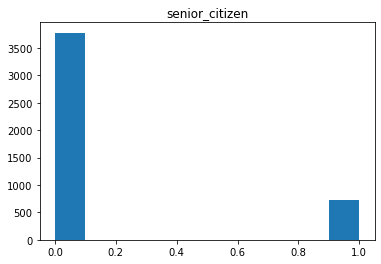

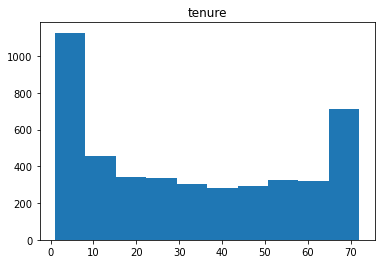

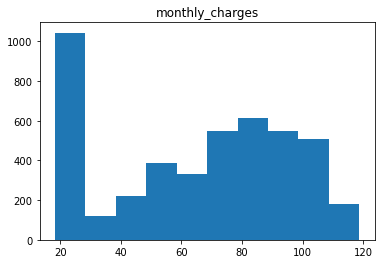

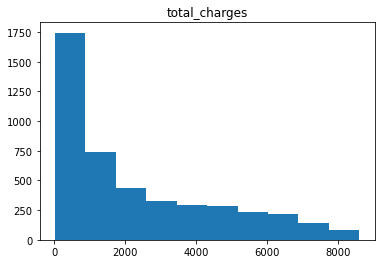

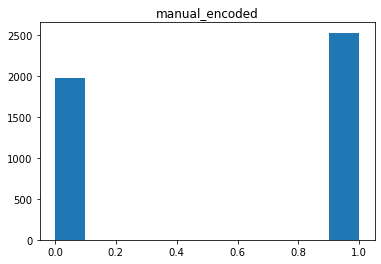

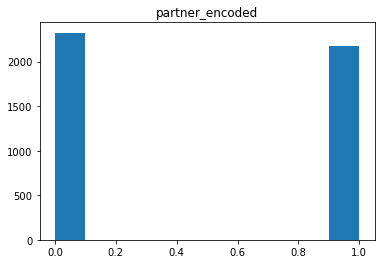

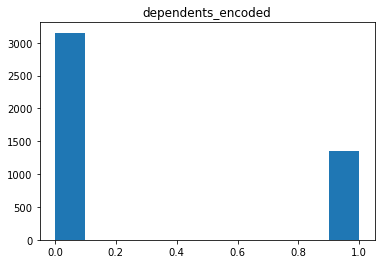

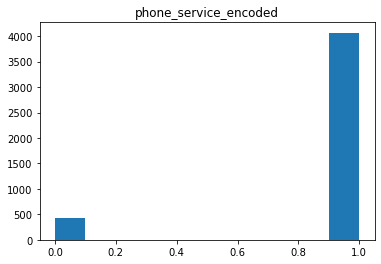

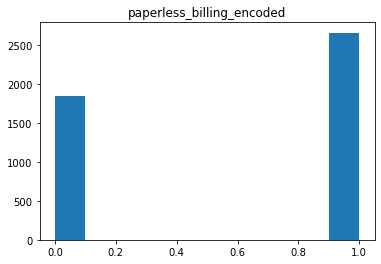

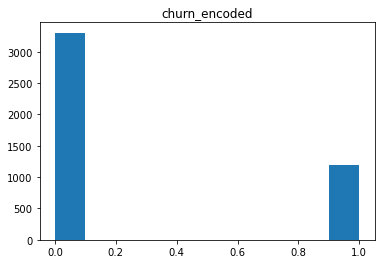

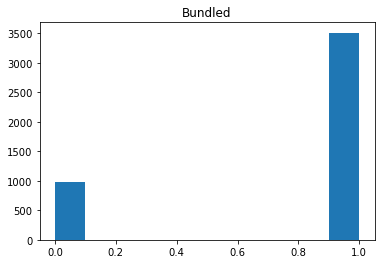

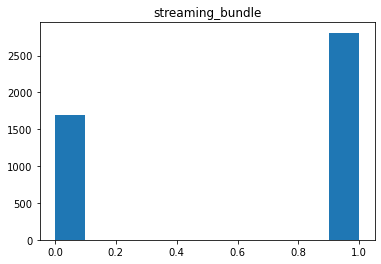

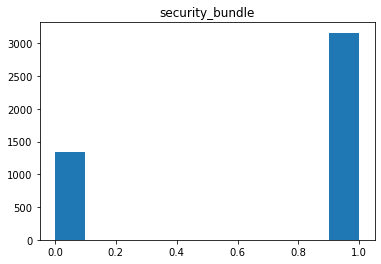

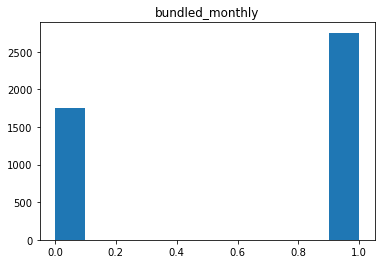

In [6]:
num_cols = telco_train.columns[[(telco_train[col].dtype == 'int64') or (telco_train[col].dtype == 'float64') for col in telco_train.columns]]
for col in num_cols:
    plt.hist(telco_train[col])
    plt.title(col)
    plt.show()

Key Take aways -
	1. Senior citizens do not make up a significant portion of the data set
	
	2. Tenure shows that we are losing most of our customers in the first five months and slowly loses until month 40 where it starts to 	     creep back up
	
	3.  Aside from the initial spike in the 20-30 range it follows an almost  normal  distribution
	
	4. Total charges align with tenure with a swift drop from the beginning
	
	5. Manual encoded pay shows more people pay by check either electronic or mailed than automatic
	
	6. Gender and if customer has partner are equally split
	
	7. More people have no dependents
	
	8. Those with phone service far outweigh those without
	
	9. More people have paperless billing than not
	
	10. Churn encoded chart shows the baseline churn model
	
	11. More than triple the amount of people bundle their service with internet and phone
	
	12. About a 1000 more people include streaming services
	
	13. More than double the customers have security features 
	
	14. Only a handful of cusotmers have only dsl and no phone service
	
	15. Everyone with fiber has a bundle with phone service

In [7]:
cat_vars = telco_train.drop(columns=['churn', 'churn_encoded', 'total_charges', 'monthly_charges', 'tenure', 'total_charge_groups'])

target = 'churn_encoded'

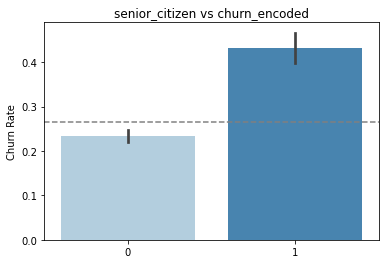

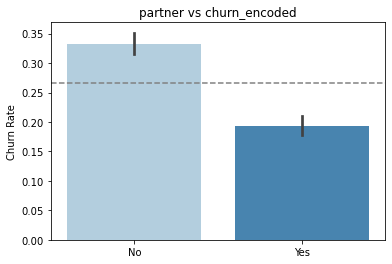

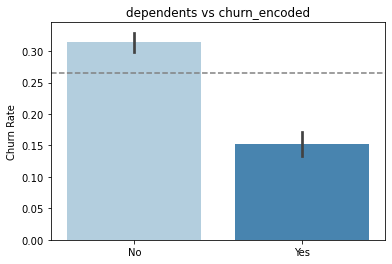

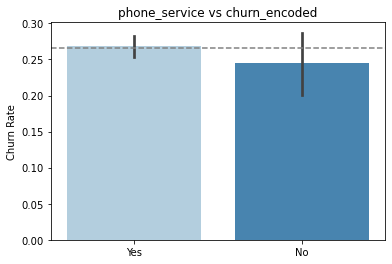

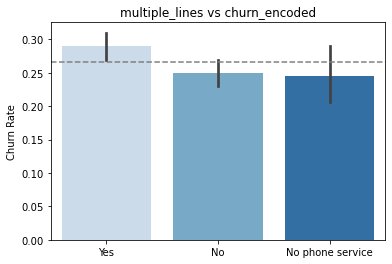

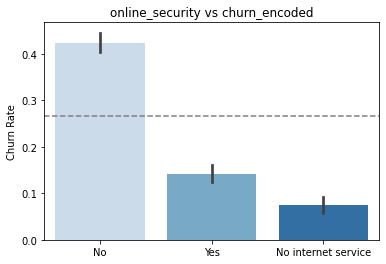

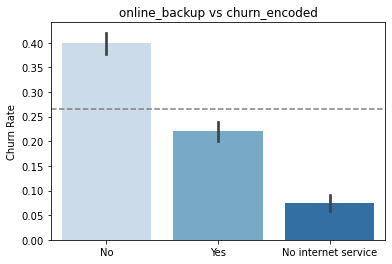

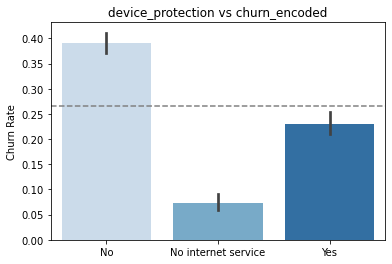

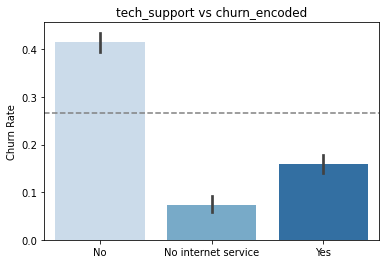

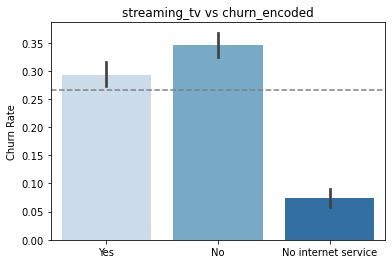

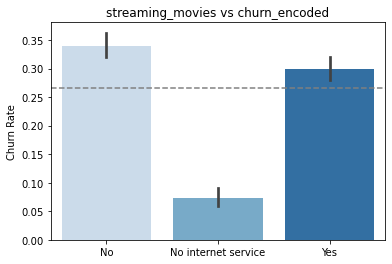

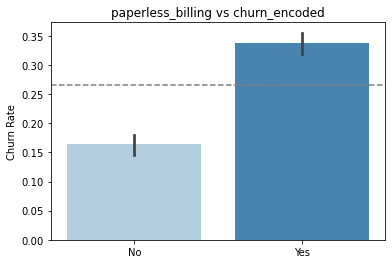

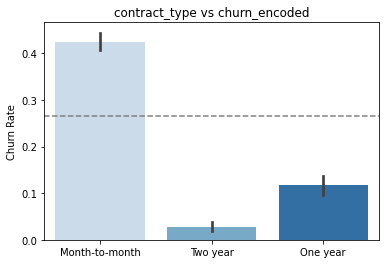

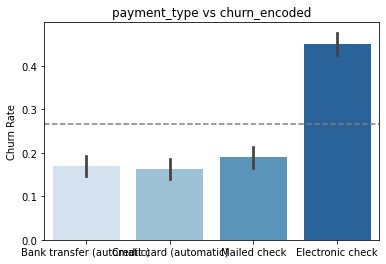

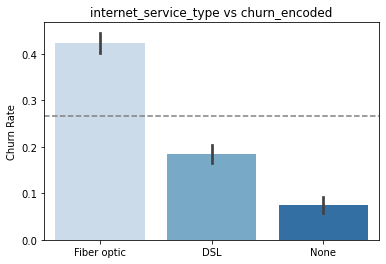

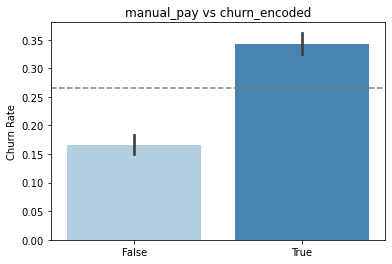

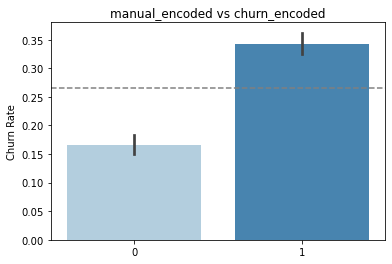

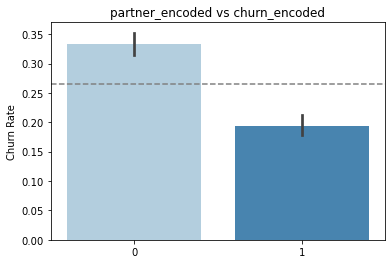

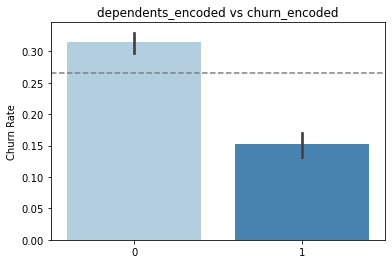

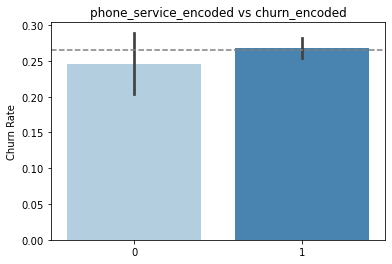

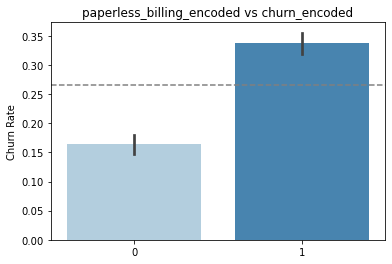

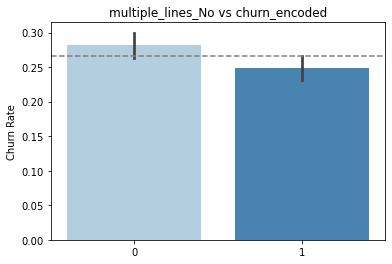

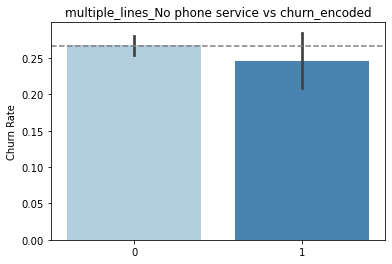

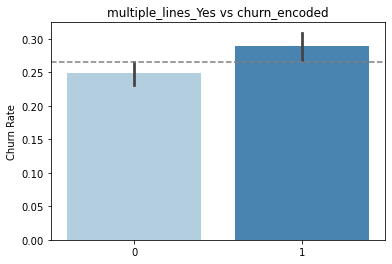

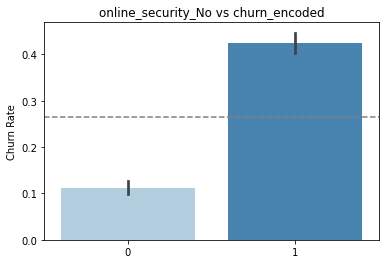

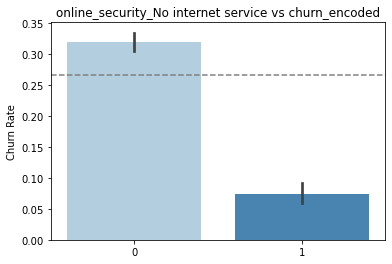

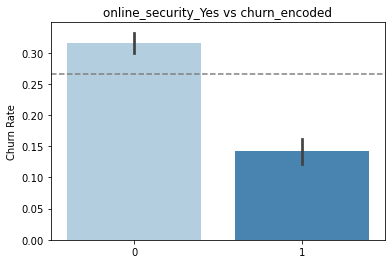

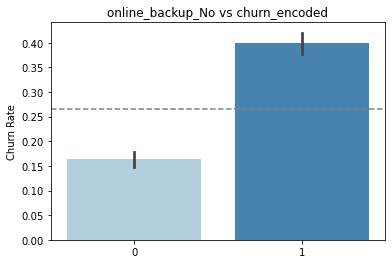

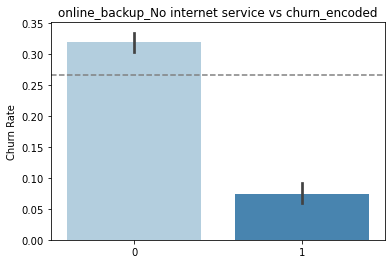

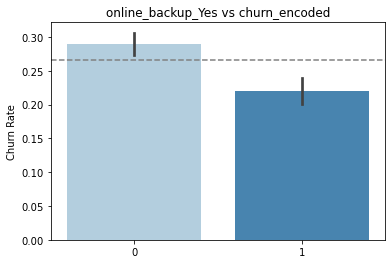

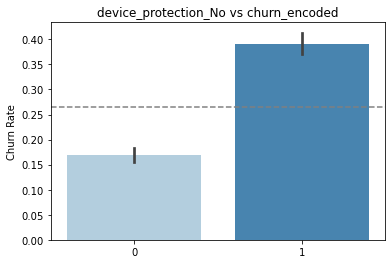

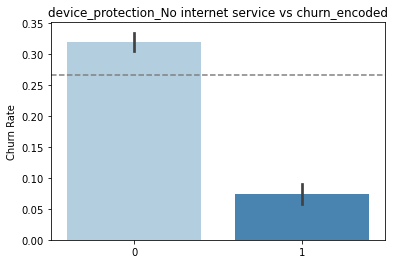

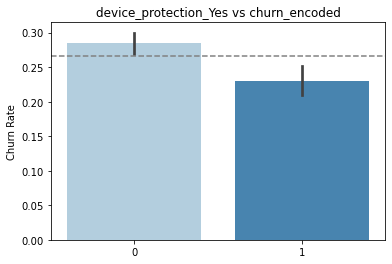

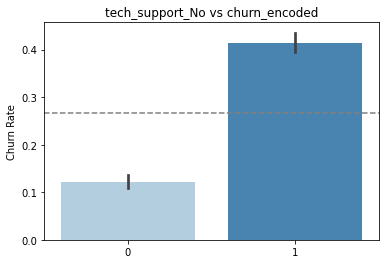

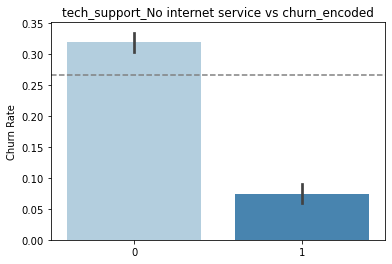

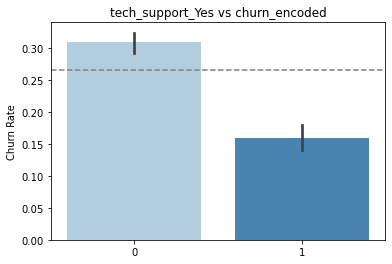

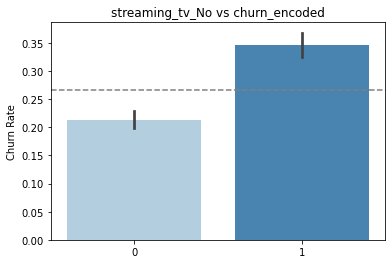

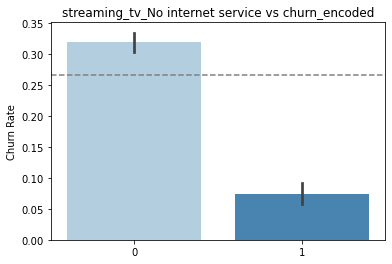

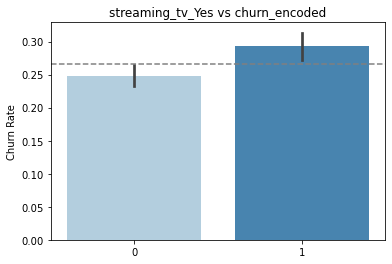

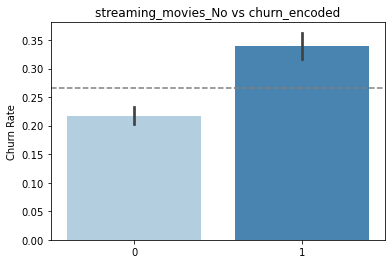

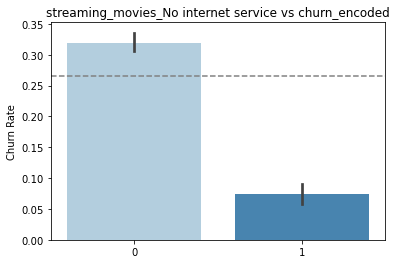

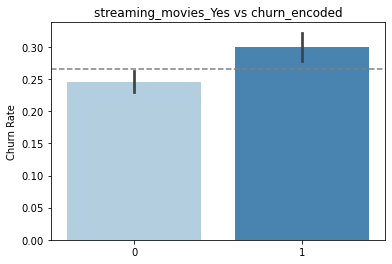

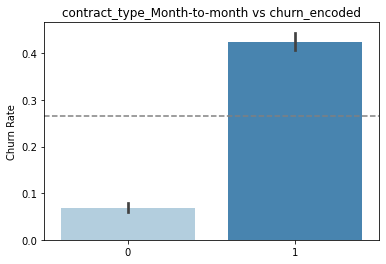

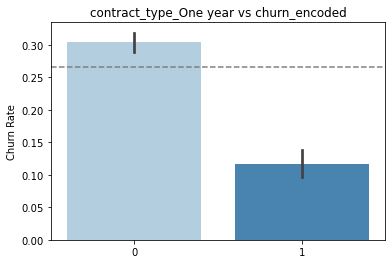

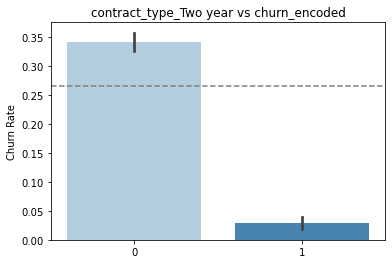

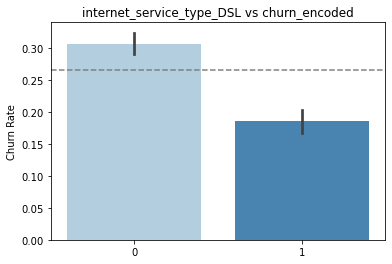

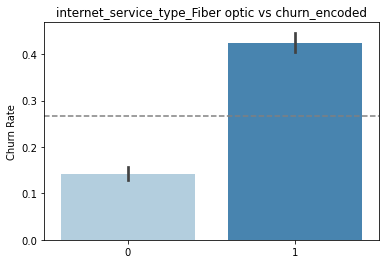

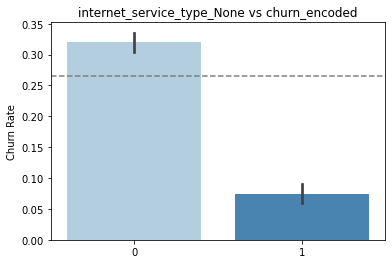

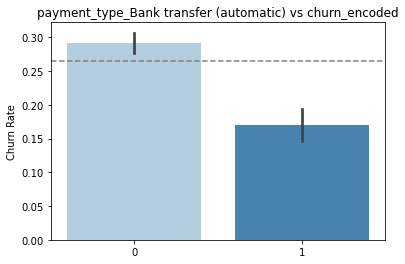

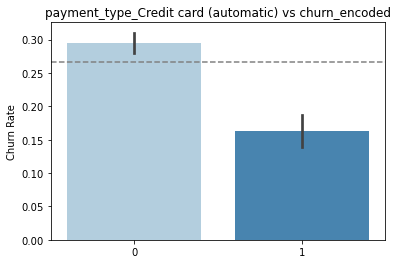

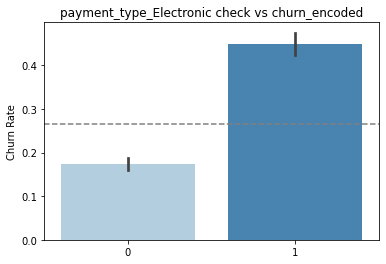

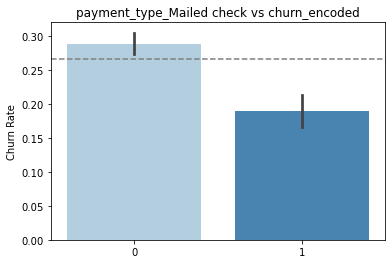

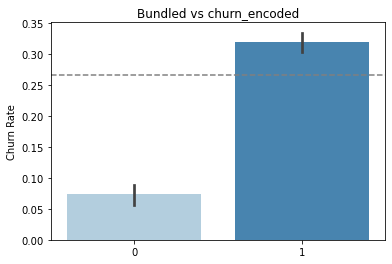

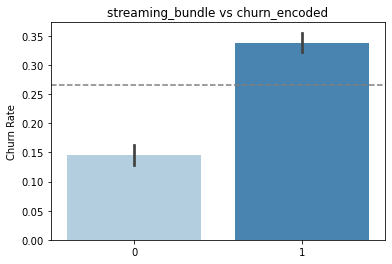

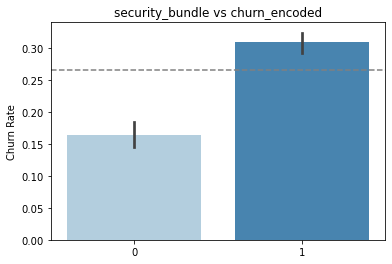

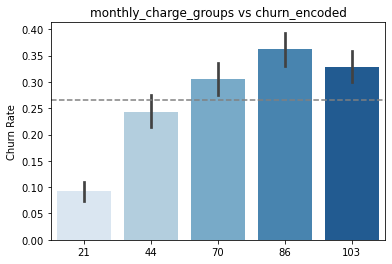

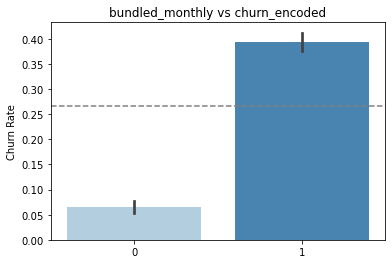

In [8]:


def barplot_bivariate(df, target, var):
 
    overall_mean = telco_train['churn_encoded'].mean()
    sns.barplot(var, target, data=df, palette="Blues")
    plt.xlabel('')
    plt.ylabel('Churn Rate')
    plt.title(var + ' vs ' + target)
    plt.axhline(overall_mean, ls = '--', color = 'grey')
    plt.show()
 
for var in cat_vars:
    # bar plot with overall horizontal line
    barplot_bivariate(telco_train, target, var)



- This is a lot of graphs but I wanted to just plot them all and see what variables stood out the most for me

Key Takeaways in variables vs churn
- Senior citizen churn more but don’t make up enough of the sample to test
- Customers without a partner churn more and appears statistically significant
- Customers without depends churn double than those with dependents
- Phone service is almost an even split and will not be worth considering
- Multiple lines is also too close to call and will not be worth considering
- Online security is a big one and will be included in my my questions
- Online backup is not as significant as security but appears to play a large roll as well…might consider that in my questions
- Device protection seems to have more churn to those who do not have it
- Customers without Tech support are churning at a much higher pace
- Combining the steaming tv and movies appears to show that with or without customers churn more a lose lose
- Paperless billing can offer some insight into churn but I believe most 
- Month to month is by far and away one of the highest factors of churn
- Electronic check appears to be large factor in customer deciding to churn
- Customers who manually pay seems to be churning at a higher rate as well
- The encoded charts appear to be the same as above and will not comment on
- Monthly charge groups show that the more users pay the more likely to churn
- Bundled monthly is by far that largest divergence and should make a good feature to add


<AxesSubplot:>

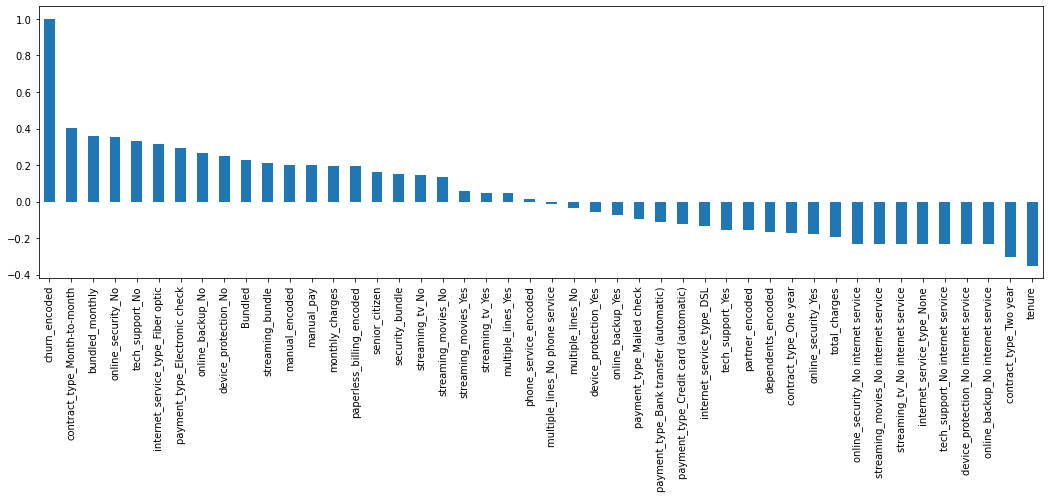

In [9]:
# This is to check to see what variables offer the best correlation 
telco_train.corr().churn_encoded.sort_values(ascending=False).plot(kind='bar', figsize=(18,5))

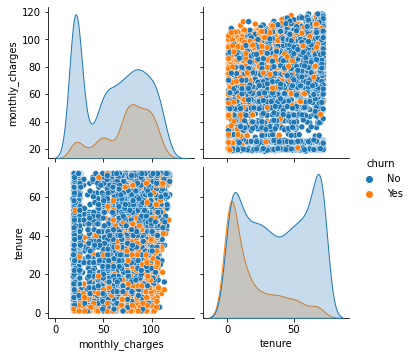

In [20]:
sns.pairplot(telco_train,vars=['monthly_charges', 'tenure'], hue = 'churn')

This chart is confirming my previous background knowledge that customers churn early and high monthly charges correlate to higher churn
- Customers churn more as their monthly charges increase
- The tenure chart shows that tenure churn rates are higher the lower the tenure. This means customers leave earlier in time with the company and churn less as they stay longer despite higher bills. 

Question 1: Do the customers who churn pay on average the same amount as those who do not churn?
-           Null Hypothesis: Customers who churn pay on average less than or equal amount to non-churning customers 
-            Alt Hypothesis: Customers who churn pay more than customer who do not churn   


In [22]:
# Preforming a T test for contiunous monthly charges against churn
t, p = stats.ttest_ind(telco_train.monthly_charges, telco_train.churn_encoded, equal_var=False)
t, p/2 

(143.118293750289, 0.0)


Question 2: Are customers with fiber optic more or less likely to churn?
-            Null Hypothesis: Fiber Optic customers churn less than or equal amount to non-fiber optic customers 
-            Alt Hypothesis: Fiber Optic customers pay more than non-fiber optic customers     

In [23]:
# Making a crosstab to preform a chi squared test on my target variable
internet_service_stat = pd.crosstab(telco_train['internet_service_type_Fiber optic'], telco_train.churn_encoded)

print(internet_service_stat)

a = 0.01

chi2, p, degf, expected = stats.chi2_contingency(internet_service_stat)

chi2, p

print(p)

if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded                         0    1
internet_service_type_Fiber optic           
0                                  2169  359
1                                  1135  837
3.5679038758817116e-100
We reject the null hypothesis and this variable is statistically significant


Question 3: Are month to month customers more or less likely to churn?
-            Null Hypothesis: Month to month customers churn an equal amount to contracted customers 
-            Alt Hypothesis: Month to month customers churn differently than contracted customers 

In [ ]:
# Created a crosstab to preform Chi Square test against target variable
contract_stat = pd.crosstab(telco_train['contract_type_Month-to-month'], telco_train.churn_encoded)

print(contract_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(contract_stat)

chi2, p
print(p)

if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

Question 4: Does bundling of internet and telephone services mean customers are less likely to churn than just internet or just phone customers?
-            Null Hypothesis - Customer who bundled internet and phone are less likely to churn.
-            Alt Hypothesis - Customers who bundled are equal or more likely to churn.

In [24]:
# created a crosstab to preform the chi square test on my target variable 
bundled_stat = pd.crosstab(telco_train.Bundled, telco_train.churn_encoded)

print(bundled_stat)

a = 0.01

chi2, p, degf, expected = stats.chi2_contingency(bundled_stat)

chi2, p
print(p)

if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded     0     1
Bundled                  
0               915    73
1              2389  1123
1.29849617724919e-53
We reject the null hypothesis and this variable is statistically significant


Question 5: Do customers with security suite bundles churn less than customers without security features?
-            Null Hypothesis: Customers with security services churn less or equal amount as security features
-            Alt Hypothesis: Customers with security services churn more than customers with security features

  Question 5: Do customers who bundle streaming services tend to churn less than those without streaming services?
-           Null Hypothesis: Streaming services churn less or equal amount as those without
-            Alt Hypothesis: Streaming services churn more than customers without streaming


    Question 5: Do customers with security suite bundles churn less than customers without security features?
            Null Hypothesis: Customers with security services churn less or equal amount as security features
            Alt Hypothesis: Customers with security services churn more than customers with security features


## Statistically Tests for the features in my questions

## Modeling 

After exploring the data and answering the questions, I will use the selected features and loop through 3 models. The models that I will be looping through are, K nearest neighbor, random forest, and logistic regession. The loops will help my determine what hyperparameter to start with. First I will set my x features and my target variable of churn_encoded. I used churn encoded because it is set to 1 for yes 0 for no. Within my features I will include features that are contained before making the dummy variable such as contract_type_Month-to-month as well as the one year and two year

In [13]:
# Setting the x and y features that I will use for the test
x_vars = ['contract_type_One year', 'contract_type_Two year', 'contract_type_Month-to-month', 'bundled_monthly',  'tech_support_No', 'internet_service_type_Fiber optic', 'tenure', 'internet_service_type_Fiber optic', 'payment_type_Electronic check', 'online_backup_No' ]
y_vars = 'churn_encoded'


# splitting the data the features so that I can fit the data to train, test the model on validate to check for overfitting, and finally run the model on test with unseen data
X_train, y_train = telco_train[x_vars], telco_train[y_vars]
x_validate, y_validate = telco_validate[x_vars], telco_validate[y_vars]
x_test, y_test = telco_test[x_vars], telco_test[y_vars]

The first model that I will be testing is the Random Forest. I will be looping through the model to determine the best depth to use in my final report.

In [14]:
metrics = []

for i in range(2, 25):
    # Setting the model to forest variable in order to fit the model to my data
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Using train data to fit the model and keeping validate and test seperate
    forest = forest.fit(X_train, y_train)


    # Trying the model out on my train data to see the accuracy after fitting it to that data. 
    in_sample_accuracy = forest.score(X_train, y_train)
    
    # out of sample will show how accurate the model is on unseen data and to check for overfitting
    out_of_sample_accuracy = forest.score(x_validate, y_validate)

    #Adding results and depth level to a dictionary/list to the metrics variable above. This will help me analyze the best depth to use for the model 
    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.788889,0.772444,0.016444
1,3,0.793778,0.773333,0.020444
2,4,0.800222,0.778667,0.021556
3,5,0.803778,0.780444,0.023333
4,6,0.809556,0.776000,0.033556
5,7,0.813111,0.776889,0.036222
6,8,0.820222,0.772444,0.047778
7,9,0.830889,0.766222,0.064667
8,10,0.842222,0.759111,0.083111
9,11,0.850889,0.750222,0.100667


Looking over the results, I can see that max depth of 5 offers the best accuracy on validate with minimal difference between  

## Second model to test will be K Neareast Neighbor
- Again I will loop through the model to find the the ideal neighbor number

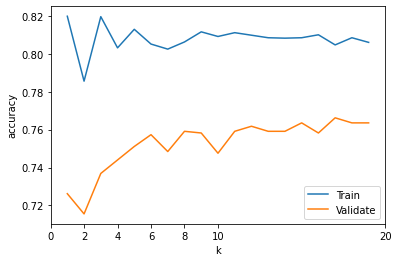

In [17]:
# setting the range of k for my model to loop through
k_range = range(1, 20)

# creating two empty lists add the scores from the model into so that I can plot them later
train_scores = []
validate_scores = []

# creating the loop as well as making the model, fitting the model to train, appending the scores to the two lists abve
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    validate_scores.append(knn.score(x_validate, y_validate))

      
# creating a vizual to see how the well the modle preforms for both the train and validate data set    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_scores, label='Train')
plt.plot(k_range, validate_scores, label='Validate')
plt.legend()
plt.xticks([0,2,4,6,8,10,20])
plt.show()

For this model I will be choosing a n_neighbor of 8 as it looks to be best validate accuracy with over training the model 

## Last model will be Logistic Regression
- This model again will loop through to determine the best C value 

In [18]:
# Creating a funcition to build the model, fit to training data, record accuracy of the model on validate, record the coefficients for each variable to see what the model evaluates them t
def evaluate_model(c):
    model = sklearn.linear_model.LogisticRegression(C=c)
    model.fit(X_train, y_train)
    accuracy = model.score(x_validate, y_validate)
    coefs = dict(zip(X_train.columns, model.coef_[0]))
    return {'C': c, 'accuracy': accuracy, **coefs}

# looping through different C values
models = [evaluate_model(c) for c in [.001, .01, .1, 1, 10, 100, 1000]]

# Creating a dataframe so all the values are placed in one area and able to be analyzed to determine the best c level 
(pd.DataFrame(models).round(3)
 .set_index(['C', 'accuracy'])
 .style
 .set_caption('Effect of different C values on accuracy (t=.5) and the resulting coefficients.')
 .set_precision(3)
)

,,contract_type_One year,contract_type_Two year,contract_type_Month-to-month,bundled_monthly,tech_support_No,internet_service_type_Fiber optic,tenure,payment_type_Electronic check,online_backup_No
C,accuracy,,,,,,,,,
0.001000,0.775000,-0.040,-0.069,0.110,0.162,0.144,0.199,-0.035,0.130,0.088
0.010000,0.784000,-0.074,-0.267,0.341,0.367,0.325,0.474,-0.032,0.346,0.163
0.100000,0.772000,0.005,-0.578,0.571,0.417,0.350,0.561,-0.029,0.433,0.164
1.000000,0.772000,0.049,-0.701,0.640,0.413,0.345,0.571,-0.029,0.442,0.166
10.000000,0.772000,-0.443,-1.215,0.150,0.415,0.344,0.572,-0.029,0.443,0.165
100.000000,0.772000,-0.446,-1.219,0.150,0.413,0.345,0.572,-0.029,0.444,0.165
1000.000000,0.772000,-0.446,-1.220,0.150,0.412,0.344,0.573,-0.029,0.444,0.167
